### Gold Price Prediction in Python using Random Forest Regressor

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
%matplotlib inline

In [2]:
data_set=pd.read_csv('gld_price_data.csv')

In [3]:
data_set.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
data_set.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
data_set.shape

(2290, 6)

In [9]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
data_set.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [11]:
data_set.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [12]:
data_correlation=data_set.corr()

C:\Users\Siddique\AppData\Local\Temp\ipykernel_2644\4272359287.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_correlation=data_set.corr()


<AxesSubplot: >

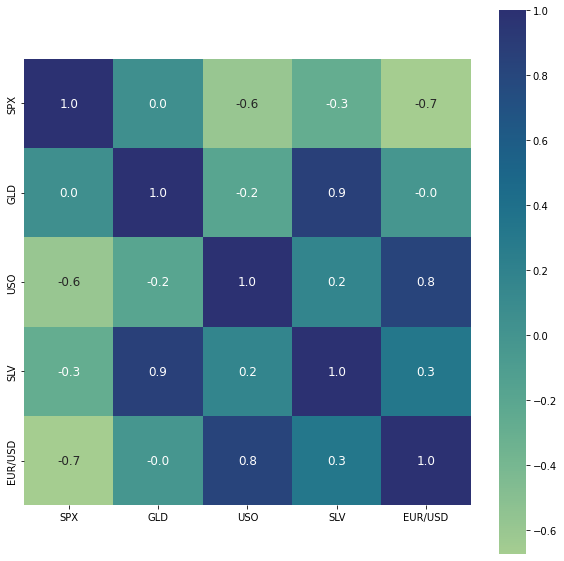

In [29]:
plt.figure(figsize=(10,10))
sns.heatmap(data_correlation,annot=True,cbar=True,fmt='.1f',annot_kws={'size':12},square=True,cmap='crest')

In [24]:
#Corelation value for gold
print(data_correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\Siddique\AppData\Local\Temp\ipykernel_2644\3224075465.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_set['GLD'],color='black',kde=True)


<AxesSubplot: xlabel='GLD', ylabel='Density'>

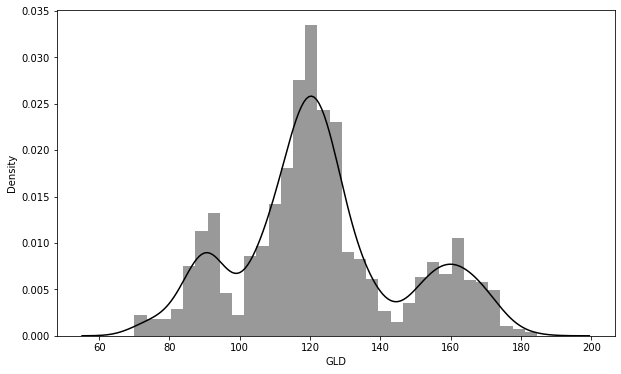

In [34]:
#distribution of gold values
plt.figure(figsize=(10,6))
sns.distplot(data_set['GLD'],color='black',kde=True)

In [28]:
print("Mean:",data_set['GLD'].mean())
print("Median:",data_set['GLD'].median())
print("Mode:",data_set['GLD'].value_counts().head())

Mean: 122.73287507292576
Median: 120.580002
Mode: 115.940002    5
117.959999    4
122.209999    4
126.300003    4
124.589996    4
Name: GLD, dtype: int64


In [45]:
X=data_set.drop(['Date','GLD'],axis=1)
Y=data_set['GLD']
print("Predictor Variables")
print(X.head())
print("Target Variable")
print(Y.head())

Predictor Variables
           SPX        USO     SLV   EUR/USD
0  1447.160034  78.470001  15.180  1.471692
1  1447.160034  78.370003  15.285  1.474491
2  1411.630005  77.309998  15.167  1.475492
3  1416.180054  75.500000  15.053  1.468299
4  1390.189941  76.059998  15.590  1.557099
Target Variable
0    84.860001
1    85.570000
2    85.129997
3    84.769997
4    86.779999
Name: GLD, dtype: float64


In [47]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [48]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1832, 4)
(1832,)
(458, 4)
(458,)


In [49]:
regressor=RandomForestRegressor(n_estimators=100)

In [50]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [51]:
data_prediction=regressor.predict(X_test)

In [53]:
error_score=metrics.r2_score(Y_test,data_prediction)

In [54]:
print("R Square Error :",error_score)

R Square Error : 0.9897193156726538


In [55]:
Y_test=list(Y_test)

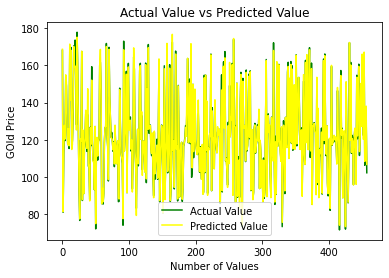

In [72]:
plt.plot(Y_test,color='green',label='Actual Value')
plt.plot(data_prediction,color='yellow',label='Predicted Value')
plt.title("Actual Value vs Predicted Value")
plt.xlabel("Number of Values")
plt.ylabel("GOld Price")
plt.legend()
plt.show()